<a href="https://colab.research.google.com/github/Usuarioah03/Challenge-de-Modelado-de-datos-con-Python/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [18]:
import matplotlib.pyplot as plt


In [19]:
productos = ['Asistente virtual', 'Mesa de comedor', 'Juego de mesa', 'Microondas', 'Silla de oficina']
precios = [164300.0, 192300.0, 209600.0, 757500.0, 335200.0]
envios = [6900.0, 8400.0, 15900.0, 41000.0, 20200.0]

In [20]:
totales = []
for i in range(len(productos)):
    total = precios[i] + envios[i]
    totales.append(total)

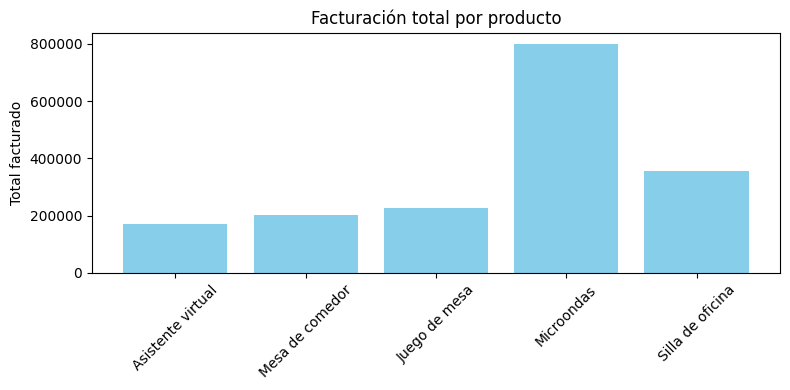

In [21]:
def graficar_facturacion():
    plt.figure(figsize=(8, 4))
    plt.bar(productos, totales, color='skyblue')
    plt.title('Facturación total por producto')
    plt.ylabel('Total facturado')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

graficar_facturacion()

# 2. Ventas por categoría

In [22]:
categorias = ['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Muebles']


In [23]:
ventas_categoria = {}
for i in range(len(productos)):
    categoria = categorias[i]
    if categoria in ventas_categoria:
        ventas_categoria[categoria] += precios[i]
    else:
        ventas_categoria[categoria] = precios[i]

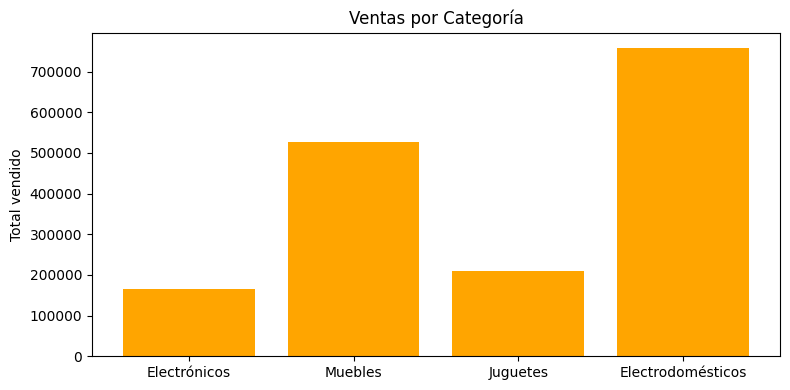

In [24]:
def graficar_ventas_categoria():
    plt.figure(figsize=(8, 4))
    plt.bar(ventas_categoria.keys(), ventas_categoria.values(), color='orange')
    plt.title('Ventas por Categoría')
    plt.ylabel('Total vendido')
    plt.tight_layout()
    plt.show()

graficar_ventas_categoria()

# 3. Calificación promedio de la tienda


In [26]:
calificaciones = [4, 1, 1, 4, 5]

In [27]:
suma = 0
for c in calificaciones:
    suma += c
promedio = suma / len(calificaciones)

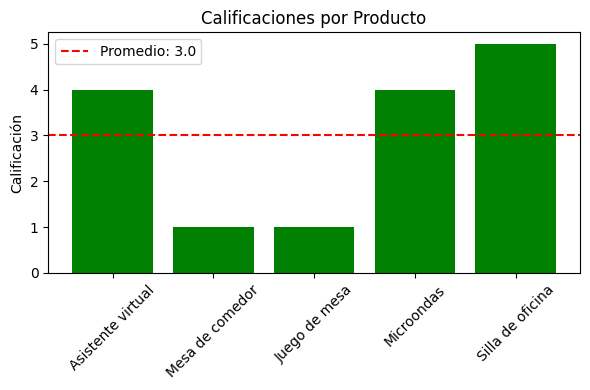

In [28]:
def graficar_calificaciones():
    plt.figure(figsize=(6, 4))
    plt.bar(productos, calificaciones, color='green')
    plt.axhline(promedio, color='red', linestyle='--', label=f'Promedio: {promedio:.1f}')
    plt.title('Calificaciones por Producto')
    plt.ylabel('Calificación')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

graficar_calificaciones()

# 4. Productos más y menos vendidos

In [29]:
productos_ordenados = []
precios_ordenados = []

In [30]:
indices = list(range(len(productos)))
for i in range(len(indices)):
    for j in range(i+1, len(indices)):
        if precios[indices[i]] < precios[indices[j]]:
            indices[i], indices[j] = indices[j], indices[i]

for i in indices:
    productos_ordenados.append(productos[i])
    precios_ordenados.append(precios[i])


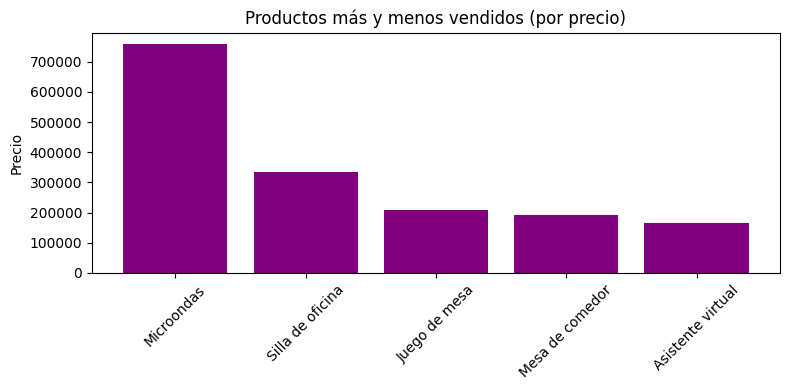

In [31]:
def graficar_productos_ordenados():
    plt.figure(figsize=(8, 4))
    plt.bar(productos_ordenados, precios_ordenados, color='purple')
    plt.title('Productos más y menos vendidos (por precio)')
    plt.ylabel('Precio')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

graficar_productos_ordenados()

# 5. Envío promedio por tienda

In [32]:
vendedores = ['Pedro Gomez', 'Beatriz Morales', 'Juan Fernandez', 'Juan Fernandez', 'Maria Alfonso']


In [33]:
envio_total = {}
contador = {}

In [37]:
for i in range(len(productos)):
    vendedor = vendedores[i]
    if vendedor in envio_total:
        envio_total[vendedor] += envios[i]
        contador[vendedor] += 1
    else:
        envio_total[vendedor] = envios[i]
        contador[vendedor] = 1



In [38]:
envio_promedio = {}
for vendedor in envio_total:
    envio_promedio[vendedor] = envio_total[vendedor] / contador[vendedor]

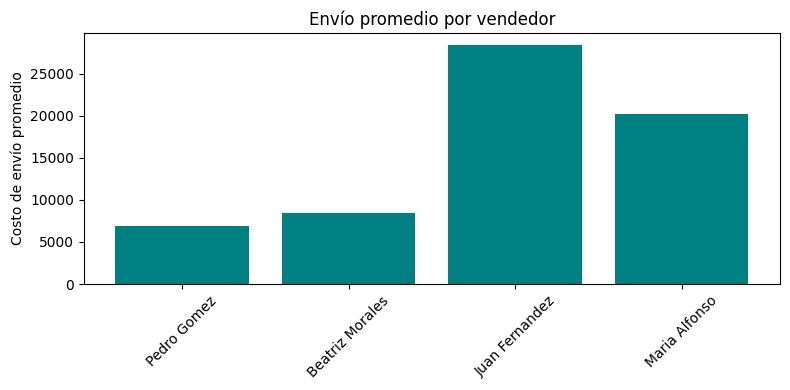

In [39]:
def graficar_envio_promedio():
    plt.figure(figsize=(8, 4))
    plt.bar(envio_promedio.keys(), envio_promedio.values(), color='teal')
    plt.title('Envío promedio por vendedor')
    plt.ylabel('Costo de envío promedio')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

graficar_envio_promedio()